In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy as sp
import scipy.optimize as op
from scipy.interpolate import UnivariateSpline
import copy
import re

# Adding library directory to python search path
import os
import sys
import git
repo = git.Repo('.', search_parent_directories=True)
library_dir = repo.working_tree_dir + '/lib'
sys.path.insert(0, library_dir)

import miptlib as mipt

# Create directory for generated .tex and .pdf
if not os.path.exists('gen'):
    os.mkdir('gen')


In [2]:
class consts:
    pi = 3.141592
    c = 3e8
    e = 1.6e-19

class setup:
    dummy = 0


### Spectra

In [3]:
data = mipt.read_excel('data/co60_400.xlsx', usecols=('A', 'B'),header=(0))
data


,Channel,Counts
0,1,0
1,2,0
2,3,0
3,4,2
4,5,0
...,...,...
2043,2044,0
2044,2045,0
2045,2046,0
2046,2047,0


ambient_noise


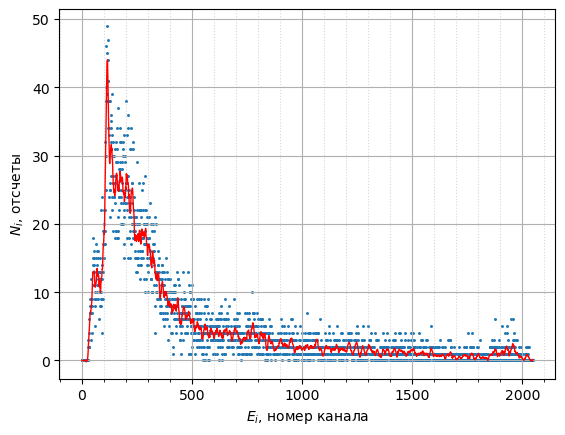

ambient_noise_log


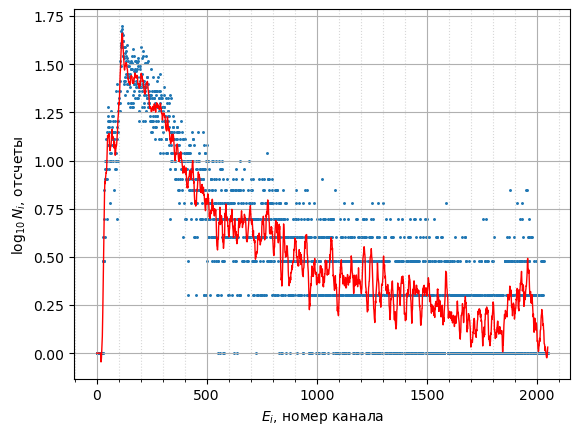

co60


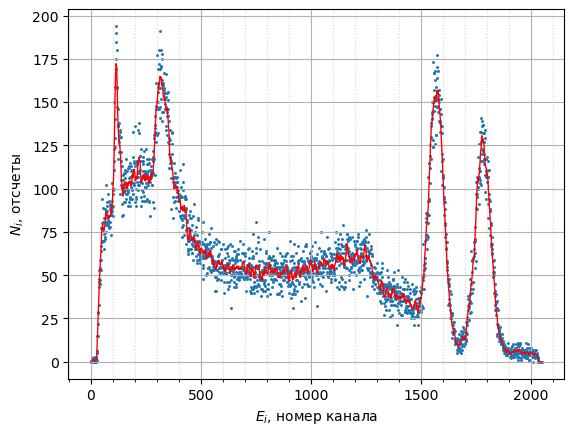

co60_log


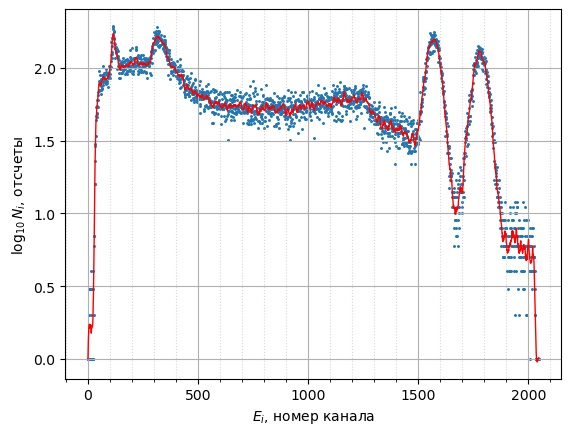

na22


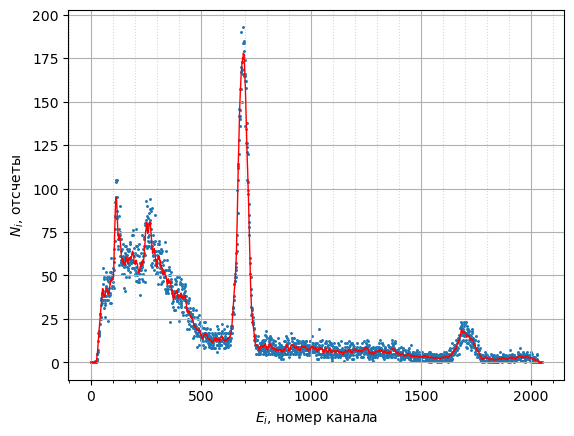

na22_log


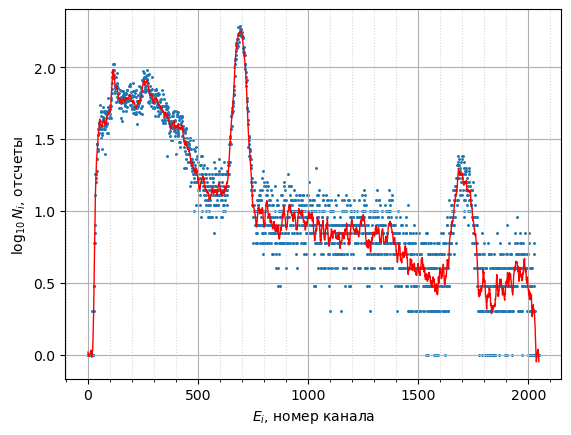

cs137


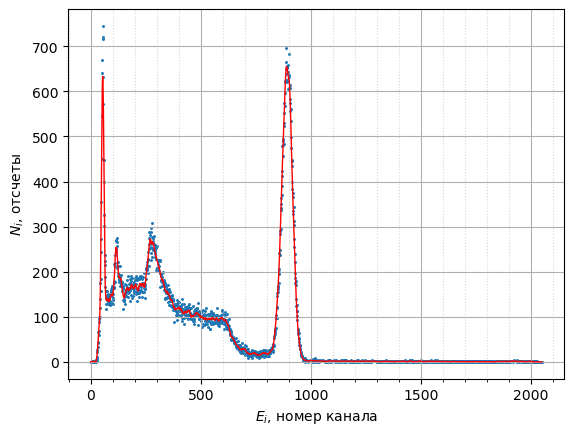

cs137_log


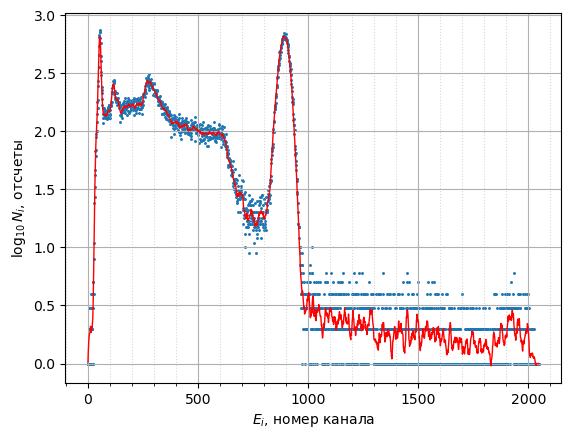

eu152


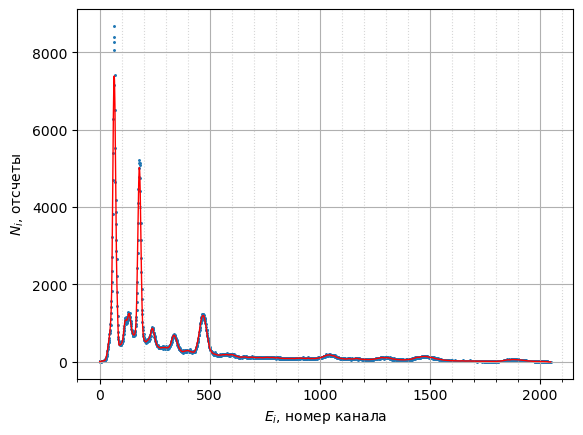

eu152_log


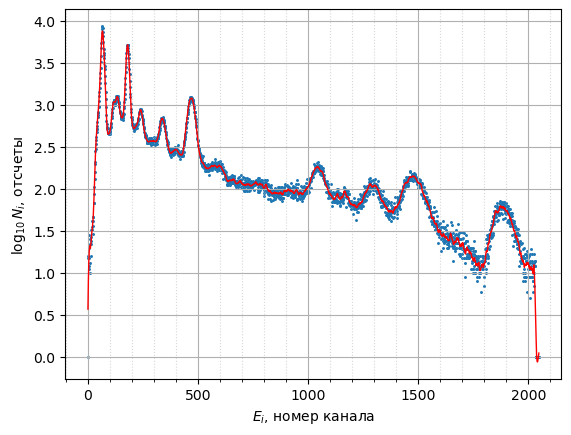

am241


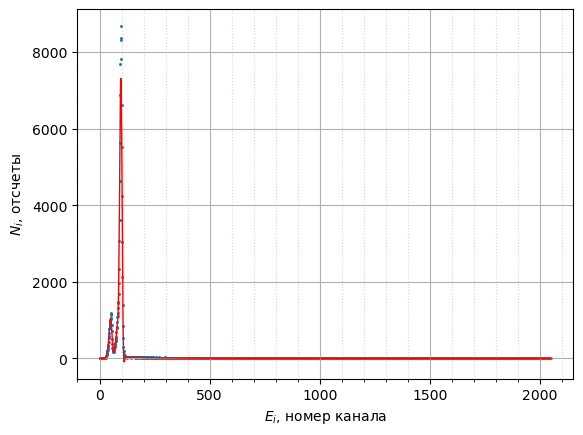

am241_log


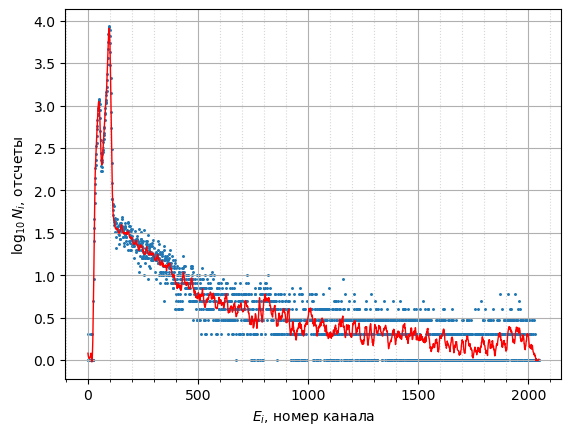

In [4]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy.signal import savgol_filter


def process(excel_file, fig_file):
    data = mipt.read_excel(excel_file, usecols=('A', 'B'),header=(0))

    # Linear
    fig, ax = plt.subplots()
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))

    x = data['Channel']
    y = data['Counts']
    y_smooth = savgol_filter(y, 21, 3) # window size 51, polynomial order 3
    ret_val = {'x' : x, 'y' : y, 'y_smooth' : y_smooth}

    plt.plot(x, y_smooth, linewidth=1, color='r')
    plt.scatter(x, y, marker='.', s=5)
    plt.xlabel(r'$E_i$, номер канала')
    plt.ylabel(r'$N_i$, отсчеты')
    ax.grid(which='major', linestyle='-')
    ax.grid(which='minor', alpha=0.5, linestyle=':')

    plt.savefig('gen/' + fig_file + '.pdf')

    print(fig_file)
    plt.show()

    # Logarithm
    fig, ax = plt.subplots()
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
                # Add one to remove division by zero
    x = x
    y = np.log10(y + 1)
    y_smooth = savgol_filter(y, 21, 3) # window size 51, polynomial order 3

    plt.plot(x, y_smooth, linewidth=1, color='r')
    plt.scatter(x, y, marker='.', s=5)
    plt.xlabel(r'$E_i$, номер канала')
    plt.ylabel(r'$\log_{10} N_i$, отсчеты')
    ax.grid(which='major', linestyle='-')
    ax.grid(which='minor', alpha=0.5, linestyle=':')
    plt.savefig('gen/' + fig_file + '_log.pdf')

    print(fig_file + '_log')
    plt.show()

    return ret_val

process('data/ambient_noise_400.xlsx', 'ambient_noise')
Co_dict = process('data/co60_400.xlsx', 'co60')
Na_dict = process('data/na22_400.xlsx', 'na22')
Cs_dict = process('data/cs137_400.xlsx', 'cs137')
Eu_dict = process('data/eu152_400.xlsx', 'eu152')
Am_dict = process('data/am241_400.xlsx', 'am241')


============= Co =============
>>> pb <<<
peak: f(116) = 172.1778358940817
x0_left=111, x0_right=127
left: f(108.43315210169699) = 133.9388689114079
right: f(125.81051468900473) = 133.93886891140792
width: 17.377362587307744
>>> back <<<
peak: f(315) = 164.88983327884807
x0_left=304, x0_right=337
left: f(292.1956286204012) = 132.40013076168572
right: f(355.41576787864653) = 132.40013076168574
width: 63.220139258245354
>>> edge <<<
peak: f(1263) = 61.47335730630876
>>> photo2 <<<
peak: f(1577) = 156.81529911735737
x0_left=1552, x0_right=1601
left: f(1531.2662037538953) = 86.52729650212403
right: f(1606.7942054248645) = 86.52729650212473
width: 75.52800167096916
>>> photo1 <<<
peak: f(1776) = 130.58417783589314
x0_left=1751, x0_right=1817
left: f(1744.169544064056) = 68.01503759398854
right: f(1820.0411358006481) = 68.01503759411568
width: 75.87159173659211

============= Cs =============
>>> peak1 <<<
peak: f(55) = 633.2216410591647
x0_left=51, x0_right=60
left: f(48.13518096225213) = 3

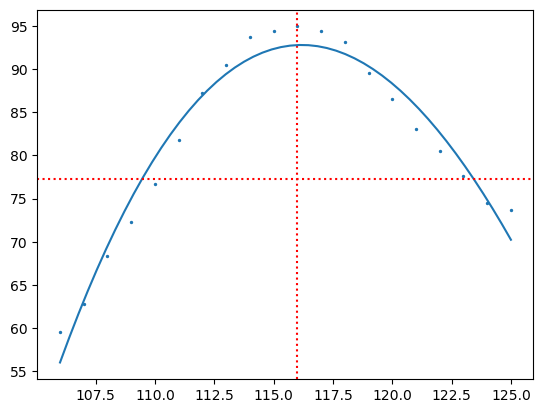

>>> peak <<<
peak: f(190) = 63.88950637463174
x0_left=188, x0_right=192
left: f(186.10062023820046) = 61.04936253677626
right: f(195.35764146330988) = 61.049362536785665
width: 9.257021225109412


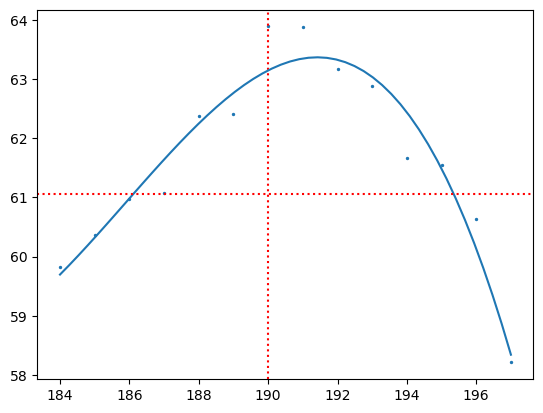

>>> back <<<
peak: f(269) = 79.97451596727386
x0_left=260, x0_right=273
left: f(246.5468505219952) = 69.66700653447377
right: f(277.44577704380697) = 69.66700653446823
width: 30.898926521811774
>>> edge <<<
peak: f(431) = 36.981366459627
>>> annihilation <<<
peak: f(693) = 178.0009807126498
x0_left=679, x0_right=712
left: f(667.308531571602) = 93.99787512258837
right: f(716.2934619172167) = 93.99787512258806
width: 48.98493034561477
>>> edge2 <<<
peak: f(1376) = 7.557334118297881
>>> photo <<<
peak: f(1683) = 18.732265446224144
x0_left=1673, x0_right=1705
left: f(1669.5147379750101) = 12.950474011114709
right: f(1729.3820676009234) = 12.95047401111478
width: 59.86732962591327

============= Eu =============
>>> peak1 <<<
peak: f(67) = 7386.014710689712
x0_left=62, x0_right=71
left: f(59.69173579115479) = 4229.291108205273
right: f(74.13773838271771) = 4229.291108205328
width: 14.446002591562923
>>> back <<<
peak: f(134) = 1249.4867603791988
x0_left=120, x0_right=139
left: f(122.3315025

In [117]:
def interp(x, y):
    # return sp.interpolate.interp1d(x, y, kind='cubic')
    return UnivariateSpline(x, y, s=100)

def extremum(label, data, begin, end, is_edge=False, edge_level=0.90, window=None):
    print(f">>> {label} <<<")
    x = np.array(data['x'][begin:end])
    y = np.array(data['y_smooth'][begin:end])
    if window != None:
        y = savgol_filter(y, window, 3)

    # Find peak
    arg_max = None
    if is_edge:
        level = max(y) * edge_level
        for i in reversed(range(0, len(x))):
            if y[i] > level:
                arg_max = i
                break
    else:
        arg_max = int(np.argmax(y))

    y_max = y[arg_max]
    y_min = min(y)
    print(f"peak: f({x[arg_max]}) = {y_max}")
    plt.axvline(x[arg_max], color='r', linestyle=':')

    # Plot peak
    plt.scatter(x, y, s=2)

    width = 0
    if not is_edge:
        equ = interp(x, y)
        lin = np.linspace(min(x), max(x))
        plt.plot(lin, equ(lin))

        half = (y_max + y_min)/2
        plt.axhline(y=half, color='r', linestyle=':')

        # Find x for half height
        func = lambda x: equ(x) - half

        x0_left = x[arg_max - arg_max // 3]
        x0_right = x[arg_max + (len(x) - arg_max) // 3]
        print(f"{x0_left=}, {x0_right=}")

        sol_left = sp.optimize.fsolve(func=func, x0=x0_left)
        sol_right = sp.optimize.fsolve(func=func, x0=x0_right)

        assert len(sol_left) == 1 and len(sol_right) == 1, "Multiple solutions found!"
        sol_left = sol_left[0]
        sol_right = sol_right[0]
        width = sol_right - sol_left
        print(f"left: f({sol_left}) = {equ(sol_left)}")
        print(f"right: f({sol_right}) = {equ(sol_right)}")
        print(f"width: {width}")

    if need_plot:
        plt.show()
    else:
        plt.close()

    return { 'peak' : x[arg_max], 'width' : width}

need_plot = False

# Co
need_plot = False
print(f"============= Co =============")
Co_dict['pb']     = extremum('pb',     Co_dict, 100,  150)
Co_dict['back']   = extremum('back',   Co_dict, 280,  380)
Co_dict['edge']   = extremum('edge',   Co_dict, 1100, 1400, is_edge=True)
Co_dict['photo2'] = extremum('photo2', Co_dict, 1500, 1650)
Co_dict['photo1'] = extremum('photo1', Co_dict, 1700, 1900)
need_plot = False
print("")

# Cs
need_plot = False
print(f"============= Cs =============")
Cs_dict['peak1'] = extremum('peak1', Cs_dict, 40, 70)
Cs_dict['pb']    = extremum('pb',    Cs_dict, 105, 125)
Cs_dict['back']  = extremum('back',  Cs_dict, 260, 300)
Cs_dict['edge']  = extremum('edge',  Cs_dict, 500, 700, is_edge=True)
Cs_dict['photo'] = extremum('photo', Cs_dict, 825, 975)
need_plot = False
print("")

# Na
print(f"============= Na =============")
need_plot = True
Na_dict['pb']           = extremum('pb', Na_dict, 105, 125)
Na_dict['peak']         = extremum('peak', Na_dict, 183, 197)
need_plot = False
Na_dict['back']         = extremum('back', Na_dict, 240, 280, window=15)
Na_dict['edge1']        = extremum('edge', Na_dict, 400, 500, is_edge=True)
Na_dict['annihilation'] = extremum('annihilation', Na_dict, 650, 750)
Na_dict['edge2']        = extremum('edge2', Na_dict, 1250, 1550, is_edge=True, window=15)
Na_dict['photo']        = extremum('photo', Na_dict, 1650, 1750)
print("")

# Eu
need_plot = False
3, 5, 6, 7, 8, 9, 10
print(f"============= Eu =============")
Eu_dict['peak1']        = extremum('peak1', Eu_dict, 50, 80)
Eu_dict['back']         = extremum('back',  Eu_dict, 90, 150)
Eu_dict['peak2']        = extremum('peak2', Eu_dict, 170, 190)
Eu_dict['photo1']       = extremum('photo1', Eu_dict, 210, 270)
Eu_dict['peak3']        = extremum('peak5', Eu_dict, 320, 360)
Eu_dict['photo2']       = extremum('photo2', Eu_dict, 440, 500)
Eu_dict['photo3']       = extremum('photo3', Eu_dict, 1000, 1100)
Eu_dict['photo4']       = extremum('photo4', Eu_dict, 1250, 1350)
Eu_dict['photo5']       = extremum('photo5', Eu_dict, 1400, 1530)
Eu_dict['photo6']       = extremum('photo6', Eu_dict, 1800, 2000)
need_plot = False
print("")

# Am
need_plot = False
print(f"============= Am =============")
Am_dict['peak1']        = extremum('peak1', Am_dict, 30, 60)
Am_dict['peak2']        = extremum('peak2', Am_dict, 60, 130)
need_plot = False
print("")


## Calibration

In [118]:
calibration_data = mipt.read_excel('data/approx.xlsx', usecols=('A', 'B', 'C'), header=(0, 1)).dropna()
calibration_data = calibration_data['Calibration']
calibration_data


,Source,E_i,N_i
0,Co 1,1332.0,1776.0
1,Co 2,1173.0,1577.0
2,Cs,661.7,889.0
3,Na (анниг),511.0,693.0
4,Na,1274.0,1683.0


,<x>,sx,<y>,sy,rxy,a,da,b,db
0,1323.6,196915.84,990.34,113666.0624,149579.836,0.759613,0.008559,-15.083794,11.947765


<class 'numpy.float64'>


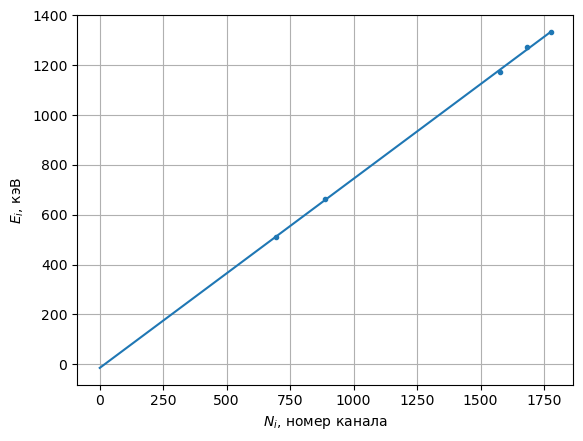

In [119]:
x_clean, y_clean, Ni2Ei = mipt.plot(calibration_data['N_i'], calibration_data['E_i'], x_min=0)
plt.grid(True)
plt.xlabel('$N_i$, номер канала')
plt.ylabel('$E_i$, кэВ')
plt.savefig('gen/calibration.pdf')

dat = mipt.mnk(x_clean, y_clean).data
display(dat)

a = dat['a'][0]
print(type(a))
b = dat['b'][0]
Ni2Ei = lambda x: a*x + b
dNi2dEi = lambda x: a*x
Ei2Ni = lambda x: (x - b)/a


In [120]:
# calibration_data['Source'] = ['$' + i + '$' for i in calibration_data['Source']]
display(calibration_data)

fmt = {
    'Source' : ['Источник'],
    'N_i' : ['$N_i$', '{:.0f}'],
    'E_i' : ['$E_i$, кэВ', '{:.0f}'],
}

table = mipt.table(calibration_data, fmt)
table.to_latex('gen/calibration.tex')


,Source,E_i,N_i
0,Co 1,1332.0,1776.0
1,Co 2,1173.0,1577.0
2,Cs,661.7,889.0
3,Na (анниг),511.0,693.0
4,Na,1274.0,1683.0


### Photopeaks

In [121]:
data = mipt.read_excel('data/approx.xlsx', usecols=('F', 'G', 'H'), header=(0, 1)).dropna()
data = data['Photopeaks']
data


,Source,N_i,dN_i
0,Co 1,1776.0,75.0
1,Co 2,1577.0,75.0
2,Cs,889.0,56.0
3,Na,1683.0,60.0
4,Eu 3,181.0,12.0
5,Eu 5,337.0,25.0
6,Eu 6,471.0,34.0
7,Eu 7,1044.0,57.0
8,Eu 8,1283.0,62.0
9,Eu 9,1474.0,86.0


In [122]:
E_i = Ni2Ei(data['N_i'])
dE_i = dNi2dEi(data['dN_i'])
data['E_i'] = E_i
data['dE_i'] = dE_i
data['R_i'] = (dE_i/E_i)

data


,Source,N_i,dN_i,E_i,dE_i,R_i
0,Co 1,1776.0,75.0,1333.988930,56.970977,0.042707
1,Co 2,1577.0,75.0,1182.825939,56.970977,0.048165
2,Cs,889.0,56.0,660.212181,42.538329,0.064431
3,Na,1683.0,60.0,1263.344920,45.576781,0.036076
4,Eu 3,181.0,12.0,122.406163,9.115356,0.074468
5,Eu 5,337.0,25.0,240.905794,18.990326,0.078829
6,Eu 6,471.0,34.0,342.693939,25.826843,0.075364
7,Eu 7,1044.0,57.0,777.952199,43.297942,0.055656
8,Eu 8,1283.0,62.0,959.499711,47.096007,0.049084
9,Eu 9,1474.0,86.0,1104.585798,65.326720,0.059141


In [123]:
# data['Source'] = ['$' + i + '$' for i in data['Source']]
display(data)

fmt = {
    'Source' : ['Источник'],
    'N_i' : ['$N_i$', '{:.0f}'],
    'dN_i' : ['$\Delta N_i$', '{:.1f}'],
    'E_i' : ['$E_i$, кэВ', '{:.0f}'],
    'dE_i' : ['$\Delta E_i$, кэВ', '{:.1f}'],
    'R_i' : ['$R_i$, \%', '{:.1f}', 2],
}

table = mipt.table(data, fmt)
table.to_latex('gen/photopeaks.tex')


,Source,N_i,dN_i,E_i,dE_i,R_i
0,Co 1,1776.0,75.0,1333.988930,56.970977,0.042707
1,Co 2,1577.0,75.0,1182.825939,56.970977,0.048165
2,Cs,889.0,56.0,660.212181,42.538329,0.064431
3,Na,1683.0,60.0,1263.344920,45.576781,0.036076
4,Eu 3,181.0,12.0,122.406163,9.115356,0.074468
5,Eu 5,337.0,25.0,240.905794,18.990326,0.078829
6,Eu 6,471.0,34.0,342.693939,25.826843,0.075364
7,Eu 7,1044.0,57.0,777.952199,43.297942,0.055656
8,Eu 8,1283.0,62.0,959.499711,47.096007,0.049084
9,Eu 9,1474.0,86.0,1104.585798,65.326720,0.059141


### R_i

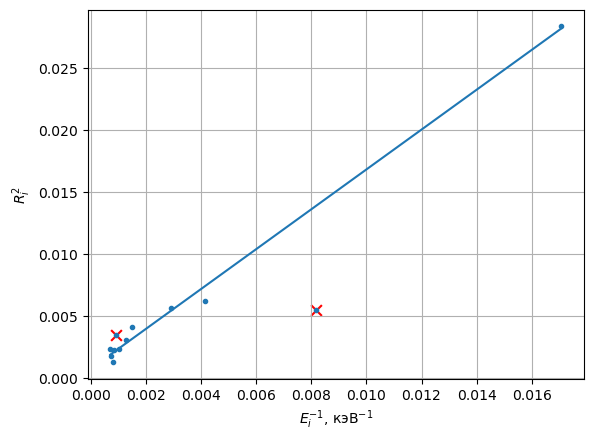

In [124]:
mipt.plot(data['E_i']**-1, data['R_i']**2, exclude=[4, 9])
plt.grid(True)
plt.xlabel('$E_i^{-1}$, кэВ$^{-1}$')
plt.ylabel('$R_i^2$')
plt.savefig('gen/R_i.pdf')


### Backscattering

In [125]:
data = mipt.read_excel('data/approx.xlsx', usecols=('N', 'O'), header=(0, 1)).dropna()
data = data['Backscattering']
data['E_i'] = Ni2Ei(data['N_i'])
E_i = data['E_i']
data['E_theory'] = E_i / (1 + 2 * E_i / 511)
# data['N_theory'] = Ei2Ni(data['E_theory'])
data


,Source,N_i,E_i,E_theory
0,Co $(back)$,315,224.194308,119.412811
1,Co $(photo)$,1577,1182.825939,210.113730
2,Co $(photo)$,1776,1333.988930,214.430038
3,Cs $(peak)$,55,26.694922,24.169650
4,Cs $(pb)$,116,73.031316,56.796721
5,Cs $(back)$,270,190.011722,108.971308
6,Cs $(photo)$,889,660.212181,184.210952
7,Na $(pb)$,116,73.031316,56.796721
8,Na,190,129.242680,85.827506
9,Na $(back)$,269,189.252109,108.721044


In [112]:
fmt = {
    'Source' : ['Источник'],
    'N_i' : [r'$N_i$', '{:.0f}'],
    'E_i' : [r'$E_i$, кэВ', '{:.0f}'],
    'E_theory' : [r'$E_{back}^{theory}$, кэВ', '{:.0f}'],
}

table = mipt.table(data, fmt)
table.to_latex('gen/back.tex')


### Compton

In [99]:
data = mipt.read_excel('data/approx.xlsx', usecols=('J', 'K', 'L'), header=(0, 1)).dropna()
data = data['Compton']
data['E_i'] = Ni2Ei(data['N_i'])
data['E_k'] = Ni2Ei(data['N_k'])
data


,Source,N_i,N_k,E_i,E_k
0,Co,1577.0,1263.0,1182.825939,944.307451
1,Cs,889.0,614.0,660.212181,451.318601
2,Na,693.0,431.0,511.328029,312.309418
3,Na,1689.0,1376.0,1267.902598,1030.143722


In [100]:
E_i = data['E_i']
data['E_theory'] = E_i / ( 1 + 511 / (2*E_i))
data


,Source,N_i,N_k,E_i,E_k,E_theory
0,Co,1577.0,1263.0,1182.825939,944.307451,972.712210
1,Cs,889.0,614.0,660.212181,451.318601,476.001230
2,Na,693.0,431.0,511.328029,312.309418,340.958264
3,Na,1689.0,1376.0,1267.902598,1030.143722,1055.254205


In [101]:
display(data)

fmt = {
    'Source' : ['Источник'],
    'N_i' : ['$N_i$', '{:.0f}'],
    'N_k' : ['$N_k$', '{:.0f}'],
    'E_i' : ['$E_i$, кэВ', '{:.0f}'],
    'E_k' : ['$E_k$, кэВ', '{:.0f}'],
    'E_theory' : ['$E_k^{theory}$, кэВ', '{:.0f}'],
}

table = mipt.table(data, fmt)
table.to_latex('gen/compton.tex')


,Source,N_i,N_k,E_i,E_k,E_theory
0,Co,1577.0,1263.0,1182.825939,944.307451,972.712210
1,Cs,889.0,614.0,660.212181,451.318601,476.001230
2,Na,693.0,431.0,511.328029,312.309418,340.958264
3,Na,1689.0,1376.0,1267.902598,1030.143722,1055.254205


,<x>,sx,<y>,sy,rxy,a,da,b,db
0,711.231477,94789.833165,684.519798,94967.221781,94876.864972,1.000918,0.004137,-27.3647,3.206453


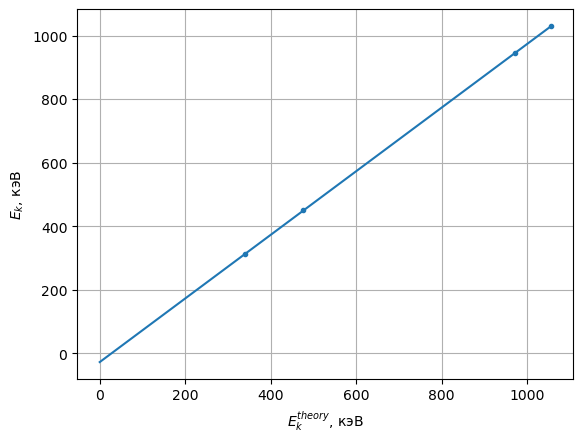

In [102]:
x, y, _ =mipt.plot(data['E_theory'], data['E_k'], x_min=0)

plt.grid(True)
plt.xlabel('$E_k^{theory}$, кэВ')
plt.ylabel('$E_k$, кэВ')
plt.savefig('gen/compton.pdf')
display(mipt.mnk(x, y).data)


In [103]:
data = mipt.read_excel('data/approx.xlsx', usecols=('R', 'S'), header=(0, 1)).dropna()
data = data['Pb']
data['E_pb'] = Ni2Ei(data['N_pb'])
data


,Source,N_pb,E_pb
0,Co,116.0,73.031316
1,Cs,116.0,73.031316
2,Na,116.0,73.031316


In [104]:
display(data)

fmt = {
    'Source' : ['Источник'],
    'N_pb' : ['$N_{pb}$', '{:.0f}'],
    'E_pb' : ['$E_{pb}$, кэВ', '{:.0f}'],
}

table = mipt.table(data, fmt)
table.to_latex('gen/pb.tex')


,Source,N_pb,E_pb
0,Co,116.0,73.031316
1,Cs,116.0,73.031316
2,Na,116.0,73.031316
